In [18]:
import pandas as pd
import numpy as np
import time
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

# GridSearch

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'degree': np.arange(0, 11)
}

grid_search = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=3, verbose=2)

In [21]:
start_time = time.time()
grid_search.fit(X, y)
time_normal_gs = time.time() - start_time

Fitting 3 folds for each of 66 candidates, totalling 198 fits
[CV] END ...................................C=0.01, degree=0; total time=   0.0s
[CV] END ...................................C=0.01, degree=0; total time=   0.0s
[CV] END ...................................C=0.01, degree=0; total time=   0.0s
[CV] END ...................................C=0.01, degree=1; total time=   0.0s
[CV] END ...................................C=0.01, degree=1; total time=   0.0s
[CV] END ...................................C=0.01, degree=1; total time=   0.0s
[CV] END ...................................C=0.01, degree=2; total time=   0.0s
[CV] END ...................................C=0.01, degree=2; total time=   0.0s
[CV] END ...................................C=0.01, degree=2; total time=   0.0s
[CV] END ...................................C=0.01, degree=3; total time=   0.0s
[CV] END ...................................C=0.01, degree=3; total time=   0.0s
[CV] END ...................................C=0

[CV] END .....................................C=10, degree=8; total time=   0.0s
[CV] END .....................................C=10, degree=8; total time=   0.0s
[CV] END .....................................C=10, degree=8; total time=   0.0s
[CV] END .....................................C=10, degree=9; total time=   0.0s
[CV] END .....................................C=10, degree=9; total time=   0.0s
[CV] END .....................................C=10, degree=9; total time=   0.0s
[CV] END ....................................C=10, degree=10; total time=   0.0s
[CV] END ....................................C=10, degree=10; total time=   0.0s
[CV] END ....................................C=10, degree=10; total time=   0.0s
[CV] END ....................................C=100, degree=0; total time=   0.0s
[CV] END ....................................C=100, degree=0; total time=   0.0s
[CV] END ....................................C=100, degree=0; total time=   0.0s
[CV] END ...................

In [22]:
grid_search.best_score_

0.9367399981435068

In [23]:
grid_search.best_params_

{'C': 1000, 'degree': 5}

In [24]:
gs_results = pd.DataFrame(grid_search.cv_results_)
gs_results.sort_values(by='mean_test_score', ascending=False, inplace=True)
gs_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
60       0.006666      0.001248         0.000000    0.000000e+00    1000   
57       0.004329      0.001228         0.000338    4.777767e-04    1000   
61       0.010665      0.006650         0.001002    5.947204e-07    1000   
59       0.005333      0.001247         0.000334    4.720447e-04    1000   
56       0.002675      0.000459         0.000325    4.602436e-04    1000   

   param_degree                    params  split0_test_score  \
60            5  {'C': 1000, 'degree': 5}           0.905263   
57            2  {'C': 1000, 'degree': 2}           0.915789   
61            6  {'C': 1000, 'degree': 6}           0.905263   
59            4  {'C': 1000, 'degree': 4}           0.905263   
56            1  {'C': 1000, 'degree': 1}           0.910526   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
60           0.963158           0.941799         0.936740        0.023905   
57           0.963158           0.931217         0.936721        0.019726   
61           0.957895           0.941799         0.934986        0.022020   
59           0.963158           0.936508         0.934976        0.023660   
56           0.968421           0.925926         0.934958        0.024483   

    rank_test_score  
60                1  
57                2  
61                3  
59                4  
56                5

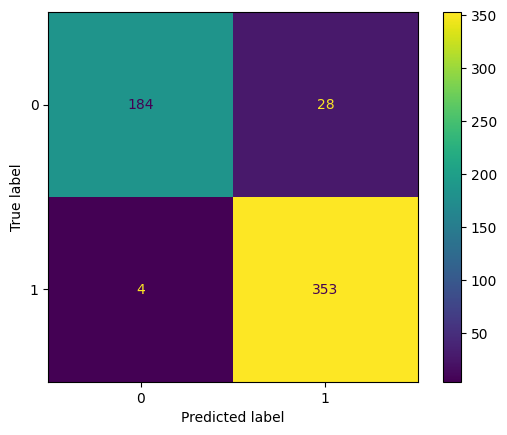

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid_search, X, y)

# Halving Grid Search

In [26]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

halving_grid_search = HalvingGridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=3, verbose=2)

start_time = time.time()
halving_grid_search.fit(X, y)
time_halving_gs = time.time() - start_time

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 21
max_resources_: 569
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 66
n_resources: 21
Fitting 3 folds for each of 66 candidates, totalling 198 fits
[CV] END ...................................C=0.01, degree=0; total time=   0.0s
[CV] END ...................................C=0.01, degree=0; total time=   0.0s
[CV] END ...................................C=0.01, degree=0; total time=   0.0s
[CV] END ...................................C=0.01, degree=1; total time=   0.0s
[CV] END ...................................C=0.01, degree=1; total time=   0.0s
[CV] END ...................................C=0.01, degree=1; total time=   0.0s
[CV] END ...................................C=0.01, degree=2; total time=   0.0s
[CV] END ...................................C=0.01, degree=2; total time=   0.0s
[CV] END ...................................C=0.01, degree=2; total time=   0.0s
[CV] END ...

[CV] END ....................................C=0.1, degree=9; total time=   0.0s
[CV] END ....................................C=0.1, degree=9; total time=   0.0s
[CV] END ....................................C=0.1, degree=9; total time=   0.0s
[CV] END ...................................C=0.1, degree=10; total time=   0.0s
[CV] END ...................................C=0.1, degree=10; total time=   0.0s
[CV] END ...................................C=0.1, degree=10; total time=   0.0s
[CV] END ......................................C=1, degree=1; total time=   0.0s
[CV] END ......................................C=1, degree=1; total time=   0.0s
[CV] END ......................................C=1, degree=1; total time=   0.0s
[CV] END .....................................C=10, degree=9; total time=   0.0s
[CV] END .....................................C=10, degree=9; total time=   0.0s
[CV] END .....................................C=10, degree=9; total time=   0.0s
[CV] END ...................

In [27]:
halving_grid_search.best_score_

0.922286014484596

In [28]:
halving_grid_search.best_params_

{'C': 10, 'degree': 2}

In [29]:
print(f"Doorlooptijd normale GS: {time_normal_gs}")
print(f"Doorlooptijd halving GS: {time_halving_gs}")

Doorlooptijd normale GS: 0.9700121879577637
Doorlooptijd halving GS: 0.3529989719390869


# Randomized Search

In [30]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'C': np.linspace(0, 1000, 10000),
    'degree': np.arange(0, 11)
}

rand_search = RandomizedSearchCV(SVC(kernel='poly'), param_distributions=param_distribs, n_iter=10, cv=3, verbose=2)
rand_search.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......................C=322.7322732273227, degree=4; total time=   0.0s
[CV] END ......................C=322.7322732273227, degree=4; total time=   0.0s
[CV] END ......................C=322.7322732273227, degree=4; total time=   0.0s
[CV] END ......................C=152.8152815281528, degree=6; total time=   0.0s
[CV] END ......................C=152.8152815281528, degree=6; total time=   0.0s
[CV] END ......................C=152.8152815281528, degree=6; total time=   0.0s
[CV] END ......................C=983.4983498349834, degree=9; total time=   0.0s
[CV] END ......................C=983.4983498349834, degree=9; total time=   0.0s
[CV] END ......................C=983.4983498349834, degree=9; total time=   0.0s
[CV] END ......................C=743.2743274327432, degree=9; total time=   0.0s
[CV] END ......................C=743.2743274327432, degree=9; total time=   0.0s
[CV] END ......................C=743.27432743274

RandomizedSearchCV(cv=3, estimator=SVC(kernel='poly'),
                   param_distributions={'C': array([0.00000000e+00, 1.00010001e-01, 2.00020002e-01, ...,
       9.99799980e+02, 9.99899990e+02, 1.00000000e+03]),
                                        'degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
                   verbose=2)

In [31]:
rand_search.best_score_

0.9314954051796157

In [32]:
rand_search.best_params_

{'degree': 6, 'C': 152.8152815281528}

In [33]:
rs_results = pd.DataFrame(rand_search.cv_results_)
rs_results.sort_values(by='mean_test_score', ascending=False, inplace=True)
rs_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_degree  \
1       0.004000  8.991328e-07         0.000667        0.000471            6   
2       0.049336  5.376757e-02         0.000999        0.000020            9   
5       0.025678  2.250236e-02         0.000659        0.000466            9   
6       0.051330  5.309330e-02         0.000666        0.000471            9   
7       0.038672  4.268752e-02         0.000332        0.000470            9   

      param_C                                 params  split0_test_score  \
1  152.815282  {'degree': 6, 'C': 152.8152815281528}                0.9   
2   983.49835  {'degree': 9, 'C': 983.4983498349834}                0.9   
5  865.086509  {'degree': 9, 'C': 865.0865086508651}                0.9   
6   965.59656  {'degree': 9, 'C': 965.5965596559655}                0.9   
7  921.192119  {'degree': 9, 'C': 921.1921192119212}                0.9   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
1           0.942105           0.952381         0.931495        0.022662   
2           0.942105           0.947090         0.929732        0.021122   
5           0.942105           0.947090         0.929732        0.021122   
6           0.942105           0.947090         0.929732        0.021122   
7           0.942105           0.947090         0.929732        0.021122   

   rank_test_score  
1                1  
2                2  
5                2  
6                2  
7                2

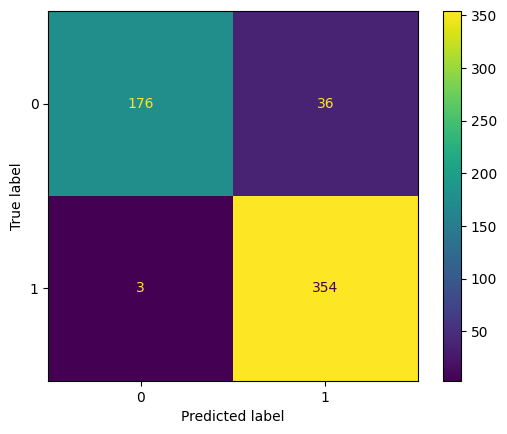

In [34]:
ConfusionMatrixDisplay.from_estimator(rand_search, X, y)